# Tutorial notebook

This notebook is to demonstrate the function of modules and how they work together.

### Step 1: argument file reader

In [1]:
# read local file into data frame
from orangecontrib.argument.miner.reader import read_json_file, validate

fpath = "../example/data/data_processed_1prod_full.json"

df_arguments = read_json_file(fpath)
df_arguments

,reviewText,overall,vote
0,I always get a half size up in my tennis shoes...,3,7.0
1,Put them on and walked 3 hours with no problem...,5,NaN
2,excelente,5,NaN
3,The shoes fit well in the arch area. They are ...,4,NaN
4,Tried them on in a store before buying online ...,5,22.0
...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,NaN
367,"I wear these everyday to work, the gym, etc.",5,NaN
368,"Love these shoes! Great fit, very light weight.",5,NaN
369,Super comfortable and fit my small feet perfec...,5,NaN


In [2]:
# select desired columns and validate data
df_arguments = df_arguments[["reviewText", "overall"]]
df_arguments = validate(df_arguments)
df_arguments

,argument,score
0,I always get a half size up in my tennis shoes...,3
1,Put them on and walked 3 hours with no problem...,5
2,excelente,5
3,The shoes fit well in the arch area. They are ...,4
4,Tried them on in a store before buying online ...,5
...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5
367,"I wear these everyday to work, the gym, etc.",5
368,"Love these shoes! Great fit, very light weight.",5
369,Super comfortable and fit my small feet perfec...,5


### Step 2: argument chunking


In [3]:
from orangecontrib.argument.miner.chunker import ArgumentChunker

chunker = ArgumentChunker(df_arguments["argument"])
df_chunks = chunker.get_chunk_table()
df_topics = chunker.get_topic_table()

/home/jqi/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jqi/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jqi/Workspace/orange3-argument/venv/lib/python3.10

In [4]:
df_chunks

,argument_id,chunk,topic,rank,polarity_score
0,0,I always get a half size up in my tennis shoes .,3,0.500000,-0.166667
1,0,For some reason these feel to big in the heel ...,11,0.500000,-0.050000
2,1,walked 3 hours with no problem,-1,0.251090,0.000000
3,1,Put them on and !,24,0.255078,0.000000
4,1,Love them !,2,0.238812,0.625000
...,...,...,...,...,...
1193,369,I can wear the shoe all day long and,24,0.125370,-0.050000
1194,369,they are easy to clean compared to other shoes...,-1,0.126786,0.225000
1195,369,They are light colored so any dirt will be see...,-1,0.127034,0.342857
1196,369,Would definitely buy another pair in a differe...,13,0.125325,0.000000


In [5]:
df_topics

,topic,count,name,keywords,keyword_scores
0,-1,163,-1_cushion_flex_lasted_supreme,"['cushion', 'flex', 'lasted', 'supreme', 'new'...","[0.2918079642799171, 0.282830224366532, 0.2789..."
1,0,97,0_cross_sneakers_boot_training,"['cross', 'sneakers', 'boot', 'training', 'cam...","[0.32230747919322, 0.3095587848864383, 0.30812..."
2,1,111,1_fits_true_expected_fit,"['fits', 'true', 'expected', 'fit', 'glove', '...","[0.4865571642119368, 0.4686870710283648, 0.456..."
3,2,73,2_turned_favorite_absolute_love,"['turned', 'favorite', 'absolute', 'love', 'th...","[0.6721086278654352, 0.6527849364704512, 0.603..."
4,3,74,3_half_ordered_size_usual,"['half', 'ordered', 'size', 'usual', 'big', 's...","[0.5106462442156431, 0.4691307799755465, 0.437..."
5,4,48,4_issues_cool_stylish_roomy,"['issues', 'cool', 'stylish', 'roomy', 'sturdy...","[0.4844816353134492, 0.4844816353134492, 0.484..."
6,5,42,5_purchase_pleased_satisfied_product,"['purchase', 'pleased', 'satisfied', 'product'...","[0.7350411093328743, 0.7282914012791674, 0.728..."
7,6,44,6_mesh_job_felt_summer,"['mesh', 'job', 'felt', 'summer', 'comfy', 'ti...","[0.6597753116920857, 0.5925474031363737, 0.538..."
8,7,41,7_everyday_zumba_use_concrete,"['everyday', 'zumba', 'use', 'concrete', 'exer...","[0.5386121564076264, 0.4602542722261374, 0.451..."
9,8,38,8_lightweight_held_minimalist_light,"['lightweight', 'held', 'minimalist', 'light',...","[0.7459075560126884, 0.7324081924454063, 0.732..."


### Step 3: argument processing

In [6]:
from orangecontrib.argument.miner.processor import ArgumentProcessor

processor = ArgumentProcessor(df_arguments)
df_arguments = processor.get_argument_table(df_chunks)
df_arguments

,argument,score,readability,topics,sentiment,coherence
0,I always get a half size up in my tennis shoes...,3,92.430000,"[3, 11]",0.445833,0.942312
1,Put them on and walked 3 hours with no problem...,5,105.880000,"[-1, 24, 2, 8]",0.625633,0.704422
2,excelente,5,-47.980000,[-1],0.500000,0.535261
3,The shoes fit well in the arch area. They are ...,4,92.171196,"[21, 11, 17, 18]",0.525206,0.827969
4,Tried them on in a store before buying online ...,5,77.864895,"[-1, 0, 4, 0, 5]",0.712583,0.813409
...,...,...,...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,72.164020,"[15, 12, 0, 9, 15, 6, 13, 20]",0.597500,0.666967
367,"I wear these everyday to work, the gym, etc.",5,94.300000,[7],0.400000,0.406570
368,"Love these shoes! Great fit, very light weight.",5,107.600000,"[22, 1]",0.799583,0.904460
369,Super comfortable and fit my small feet perfec...,5,73.544000,"[1, 6, 9, 4, 24, -1, -1, 13]",0.596054,0.665025


array([[<Axes: title={'center': 'readability'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'coherence'}>, <Axes: >]], dtype=object)

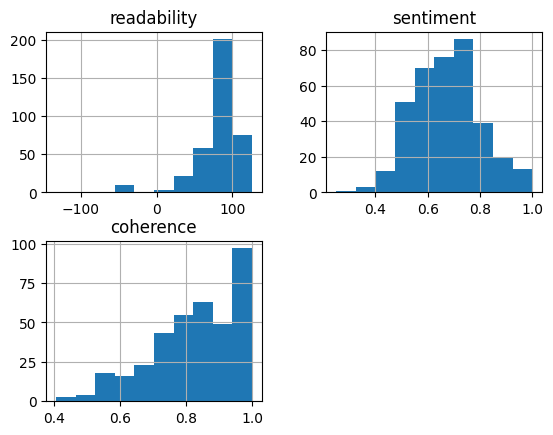

In [7]:
# plots for showing distribution of measures
df_arguments[["readability", "sentiment", "coherence"]].hist()

### Step 4: argument mining

In [15]:
from orangecontrib.argument.miner.miner import ArgumentMiner

miner = ArgumentMiner(df_arguments)
last_topic = df_topics["topic"].max()
df_nodes = miner.select_by_topic(last_topic)
df_edges = miner.get_edge_table(df_nodes)
df_nodes = miner.get_node_table(df_edges, df_nodes)
print("Last topic: %d" % last_topic)

Last topic: 25


In [16]:
df_edges.sort_values(by=["target", "source"])

,weight,source,target
1,0.069960,80,47
2,0.167913,84,47
3,0.127779,122,47
4,0.198561,155,47
5,0.171782,267,47
6,0.139419,289,47
0,0.048521,47,79
7,0.118481,80,79
8,0.216434,84,79
9,0.199657,115,79


In [17]:
df_nodes.sort_values(by="label")

,argument,score,readability,topics,sentiment,coherence,argument_id,label
0,"I wore these shoe one time, from the airport i...",1,78.457948,"[16, -1, 16, 25, 25]",0.500000,0.798516,47,defeated
1,"Great shoe! Outside arch is kind of high, but ...",5,92.894000,"[18, 15, 21, -1, -1, 3, 3, 1, 25]",0.660772,0.749995,79,defeated
2,I had to return the first pair and buy a 1/2 s...,4,110.562500,"[25, 3]",0.562500,0.868476,80,defeated
3,I bought these for gym training - weight class...,2,84.077364,"[22, 7, 9, 9, -1, 9, 25, 11]",0.516871,0.966429,84,defeated
4,Oops! I returned these because I ordered wrong...,1,80.067500,"[12, 25]",0.343750,0.949652,115,defeated
7,Ordered 9(m) received 9 Wide for the second ti...,1,94.600000,"[3, 3, 25]",0.491652,0.808438,206,defeated
8,Returning these. the pictures on here make the...,1,89.578500,"[25, -1, 13, 18, 2, -1]",0.518284,0.776265,255,defeated
9,I returned these as they were not true to size...,2,102.622115,"[25, -1]",0.509821,0.970298,267,defeated
11,"Unfortunately, this Flex Supreme does NOT have...",1,69.784667,"[8, 11, 25, -1]",0.494479,0.805095,305,defeated
12,After using this shoes seven times for regular...,1,74.308750,"[-1, -1, 20, 25]",0.346046,0.948073,306,defeated
